In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad


In [15]:
## "ISW and Phi kernels"
omegam=0.28
def hub(z):
    return np.sqrt(omegam*(1.+z)**3+(1.-omegam))
def chiint(z):
    hubinv=2997./hub(z)
    return hubinv
def chi(z): # in units of h^{-1} Mpc
    a,e=quad(chiint, 0, z)
    return a
def grint(z):
    #\int da/(a^3[H/H_0]^3) = \int dz (1+z)/[H/H_0]^3
    return (1.+z)/hub(z)**3

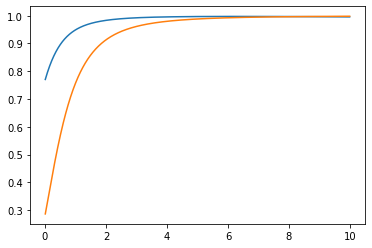

In [29]:
## Growth function
infty=100.
zarr=np.arange(0.01,10.,.01)
grarr=[]
for z in zarr:
    a,e=quad(grint,z,infty)
    grarr.append(2.5*omegam*hub(z)*a*(1.+z))
grarr=np.array(grarr)
plt.plot(zarr,grarr)
def omz(z):
    return (omegam*(1.+z)**3)/(omegam*(1.+z)**3+1.-omegam)
plt.plot(zarr,omz(zarr))